In [ ]:
from STL.StlMl import STL_strategy
import Common.ApiClient as ac
import pandas as pd
import TradingStrategy as tStrategy
import numpy as np
from STL.StlMl import STL_strategy
Api_Key ='PKZRKMC8K5EDBXSVROBY'
Secret_Key='JZNLFV8N5gJLzwPMabzM8r6gPqH67uOhqCAOnKgL'
endpoint='https://paper-api.alpaca.markets'
client = ac.ApiClient(Api_Key,Secret_Key,endpoint)



[ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  1  0  0  0  0 -1  0  0  0  0  0  0  1  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  1 -1  1 -1  1  0 -1  1 -1  1  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  1  0]
Profit based on STL ML at last 5 months: 24.23%


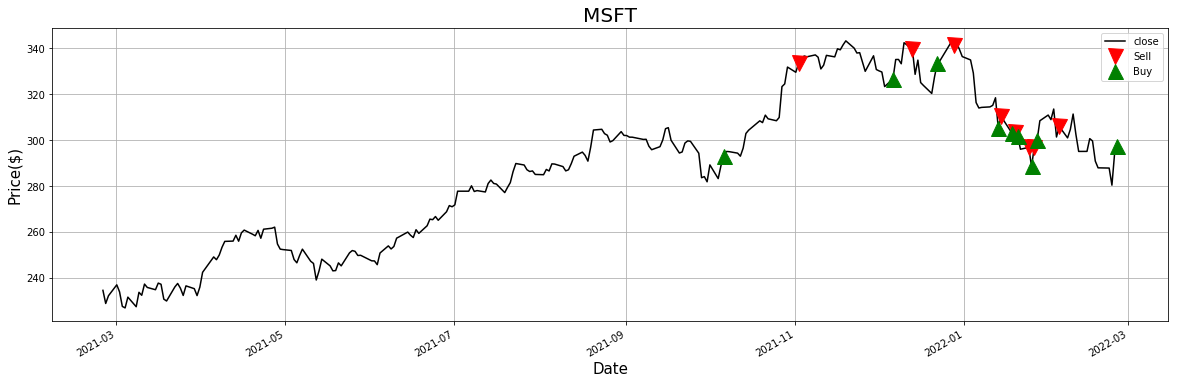

[ 0  0  0  0  0  1 -1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1
  0 -1  1  0  0  0 -1  0  0  0  0  0  0  0  0  1 -1  0  0  0  0  0  0  0
  0  0  0  0  1 -1  0  0  1 -1  1  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  1 -1  0  0  0  1  0]
Profit based on STL ML at last 5 months: 23.62%


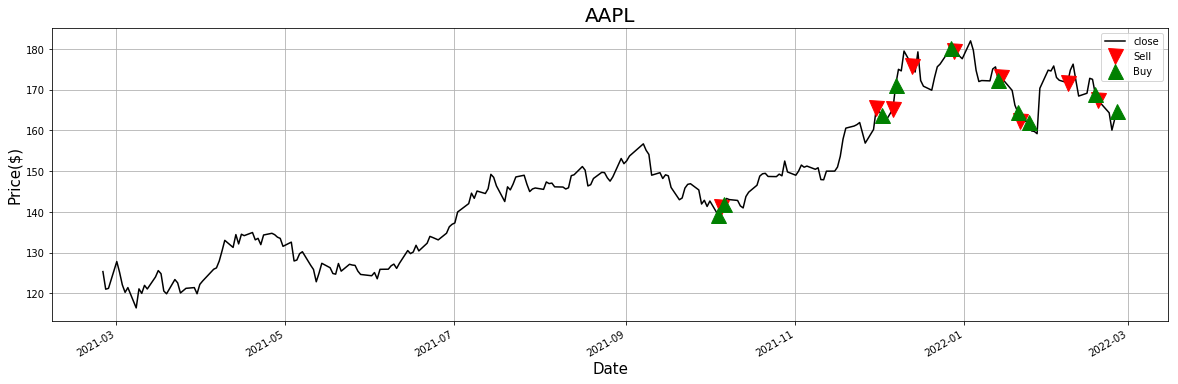

[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  1 -1  0  1  0  0 -1  0  0  0  0  0  0
  0  0  0  0  1 -1  0  0  0  1 -1  1 -1  1  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  1 -1  0  0  0  1 -1  1  0  0 -1  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 -1  1  0  0]
Profit based on STL ML at last 5 months: 21.75%


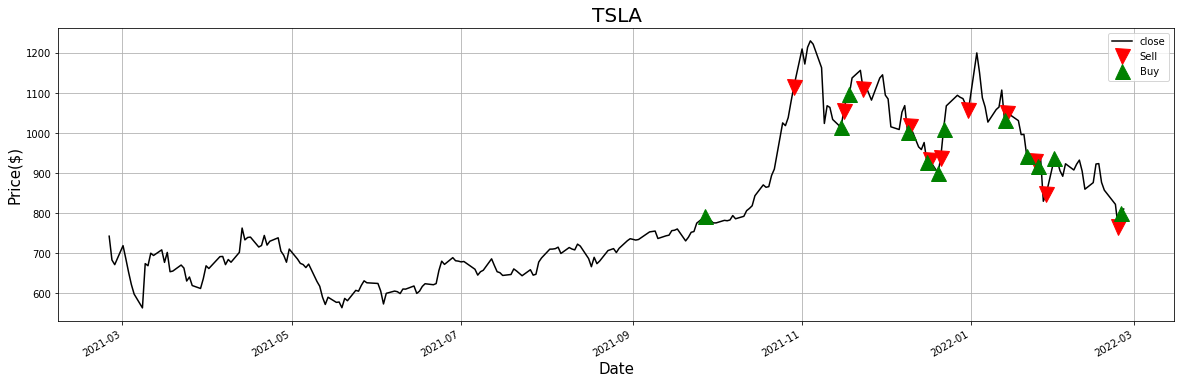

[ 1  0  0  0  0  0  0  0 -1  0  0  1 -1  0  0  0  0  0  0  0  0  0  0  1
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  1 -1  1 -1  1  0 -1  0  0  0  1 -1  0  1  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0 -1  1  0  0  0 -1  1 -1  1
  0 -1  1 -1  1 -1  1 -1  1  0  0]
Profit based on STL ML at last 5 months: 18.87%


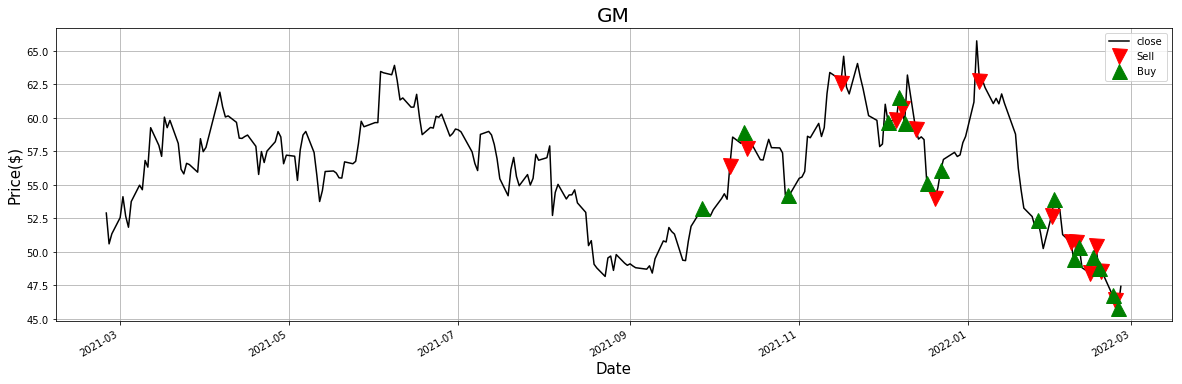

[ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0 -1  1 -1  0  1  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  0  0  0  0  0  0 -1  0  0  0  1  0 -1  1  0  0 -1  0  0  0  0  0  0  0
  0  0  1  0  0  0  0 -1  1  0 -1  1 -1  1  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  1 -1  0  0  1  0  0]
Profit based on STL ML at last 5 months: 16.36%


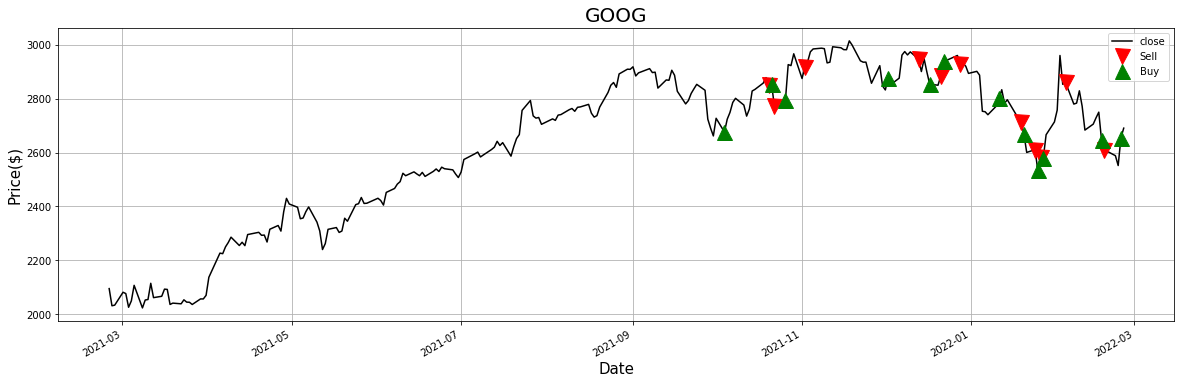

totl profit:1.05%


In [3]:
total = 0.0
from STL.StlMl import STL_strategy
for s,ticker in enumerate([ "GOOG","TSLA","MSFT","AAPL","GM"]):
    df= client.get_closing_price(ticker,255)
    df.index=pd.to_datetime(df.index,utc=True)
    stl = STL_strategy(ticker,df,'close',10,3)  
    total += stl.backtest()
print('totl profit:{:.2f}%'.format(total))

In [4]:
model = 'stl'
STOCKs=["GOOG","TSLA","MSFT","AAPL","GM"]
Strategies={}
STOCKs_money = {}
for stock in STOCKs:
    Strategies[stock]=tStrategy.TradingStrategy(stock,Api_Key,Secret_Key,model)
    


if model.lower() == 'stl': 
    for stock,tradingStrategy in Strategies.items():
        # train and prediction
        df = tradingStrategy.get_past255_closing_prices()
        df.index=pd.to_datetime(df.index,utc=True)
        tradingStrategy.trained_model = "stl"
        stocks_predict = STL_strategy(stock,df,'close',10,3).strategy()
        
        # Update current price and quantity
        tradingStrategy.get_positions_quantity()
        hold_count = tradingStrategy.EXISTING_QUANTITY         
        current_price = tradingStrategy.get_current_price()[0]        
        
        # Sell
        if hold_count!=0:
            loss = np.log(current_price/tradingStrategy.get_buy_price())
            print(stock,loss)
            if stocks_predict ==-1 or loss <-0.02:
                hold_count = 0 
                tradingStrategy.client.submit_order(stock,
                                    qty=hold_count,
                                    side="sell",
                                    type="market",
                                    time_in_force="day",
                                    order_class=None)
        # Buy    
        elif stocks_predict == 1 and hold_count==0:
            if sum(tradingStrategy.client.list_positions()) !=0 and tradingStrategy.client.get_account().cash != '100000':
                hold_count = int(np.floor(int(tradingStrategy.client.get_account().cash)/current_price))
            else:
                hold_count = int(np.floor(40000/current_price))
            tradingStrategy.client.submit_order(stock,
                                qty=hold_count,
                                side="buy",
                                type="market",
                                time_in_force="day",
                                order_class=None)    

[-1 -1 -1 -1 -1  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  0  0 -1 -1 -1  1  1  1]
[-1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1
  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1]
[ 1  1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1 -1  1  1 -1 -1 -1 -1  1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1]
[-1 -1 -1 